In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.ndimage import gaussian_filter1d, median_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import os

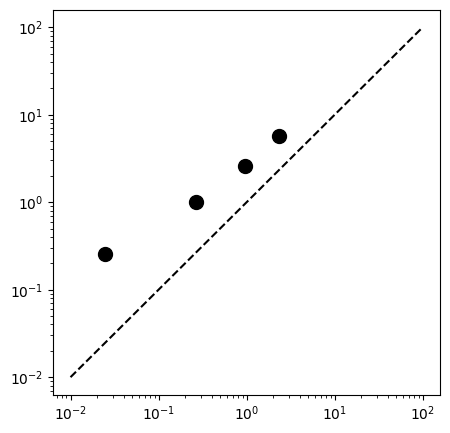

In [2]:
# load data
data = np.loadtxt('dKL_synth_colloid.dat')
H_list = [2,1,0.5,0.25]

# extract the corresponding terms
time_list = data[:, 0]
list_G_acc_gpr = data[:, 1]
list_G_acc_exp = data[:, 2]
list_G_m = data[:, 3]

f_interp_gpr = interp1d(list_G_acc_gpr[-1]-list_G_acc_gpr, np.log(time_list), kind='linear', fill_value='extrapolate')
f_interp_exp = interp1d(list_G_acc_exp[-1]-list_G_acc_exp, np.log(time_list), kind='linear', fill_value='extrapolate')

time_gpr = np.zeros_like(time_list)
time_exp = np.zeros_like(time_list)
for i in range(len(H_list)):
    H_i = H_list[i]
    time_gpr[i] = np.exp(f_interp_gpr(H_i))
    time_exp[i] = np.exp(f_interp_exp(H_i))

fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

ax.plot(time_gpr/time_exp[1], time_exp/time_exp[1], 'o', color='black', markersize=10)
ax.plot([1e-2, 1e2], [1e-2, 1e2], '--', color='black')
ax.set_xscale('log')
ax.set_yscale('log')

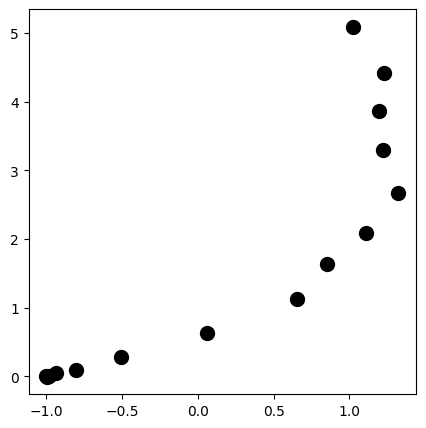

In [3]:
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

ax.plot(list_G_m-list_G_acc_exp, list_G_acc_gpr[-1]-list_G_acc_gpr, 'o', color='black', markersize=10)
# ax.plot([-2, 2], [-2, 2], '--', color='black')
# ax.set_xscale('log')
# ax.set_yscale('log')

In [4]:
def extract_time_interp(data, H_list=[2, 1, 0.5, 0.25]):
    # extract the corresponding terms
    time_list = data[:, 0]
    list_G_acc_gpr = data[:, 1]
    list_G_acc_exp = data[:, 2]
    list_G_m = data[:, 3]

    # G_ref = (list_G_acc_exp[-1]+list_G_acc_gpr[-1])/2
    G_ref = np.max(np.array([list_G_acc_exp[-1],list_G_acc_gpr[-1]]), axis=0)
    f_interp_gpr = interp1d(list_G_acc_gpr[-1]-list_G_acc_gpr, np.log(time_list), kind='linear', fill_value='extrapolate')
    f_interp_exp = interp1d(list_G_acc_exp[-1]-list_G_acc_exp, np.log(time_list), kind='linear', fill_value='extrapolate')

    time_gpr = np.zeros_like(H_list)
    time_exp = np.zeros_like(H_list)
    for i in range(len(H_list)):
        H_i = H_list[i]
        time_gpr[i] = np.exp(f_interp_gpr(H_i))
        time_exp[i] = np.exp(f_interp_exp(H_i))
        time_gpr[i] = np.min([time_gpr[i], time_exp[i]])
        
    return time_gpr, time_exp

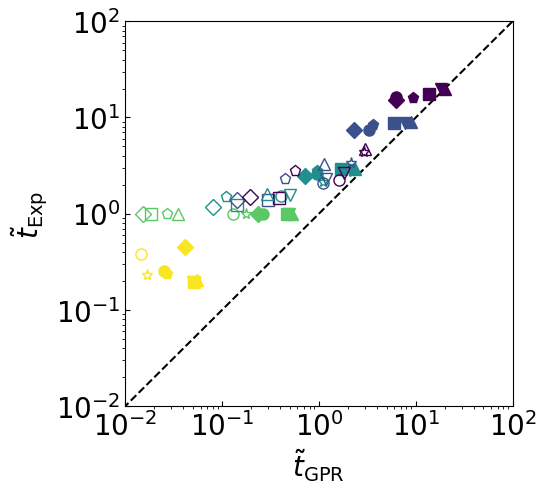

In [5]:
filename_list = ['dKL_synth_colloid.dat', 'dKL_synth_polymer.dat', 'dKL_synth_sponge.dat', 'dKL_synth_star.dat', 'dKL_synth_agg.dat', 'dKL_synth_ts.dat', 
                 'dKL_exp_SDS.dat', # SDS
                #  'dKL_exp_21217-8m8a-HS.dat', 
                #  'dKL_exp_21535-8m8a-a.dat',
                 'dKL_exp_23463-4m12a-t3.dat', # a 
                 'dKL_exp_22386-9m15a-CVWLM2.dat', # b
                 'dKL_exp_22386-9m15a-CVWLM7.dat', # c
                #  'dKL_exp_22170-8m8a-BQ.dat', 
                 'dKL_exp_22170-8m8a-S5A.dat', # d
                #  'dKL_exp_22170-8m8a-S3A.dat',
                #  'dKL_exp_22170-8m8a-S1A.dat',
                 'dKL_exp_22193-9m15a-ws2.dat', # e
                #  'dKL_exp_22193-9m15a-ws6.dat',
                #  'dKL_exp_22193-9m15a-banjo.dat',
                 'dKL_exp_25953-9m15a-9.dat', # f
                 
                 ]
labels_list = [
    'Colloid', 
    'Polymer', 
    'Sponge', 
    'Starpolymer', 
    'Fractal', 
    'Teubner-Strey', 
    'SDS', 
    # 'Sample Holder 1 (?)',  # Unclear naming; verify correctness
    # 'CPyCl/NaBr',
    'P3AT', 
    r'CTAB/NaSal $\alpha=0.95$', 
    r'CTAB/NaSal $\alpha=0.7$', 
    # 'Banjo Cell',  # Verify proper capitalization if it's a named device
    'Peptoid Amphiphile',
    # 'S3A',  # Verify naming convention
    # 'S1A',  # Verify naming convention
    'DNA/Surfactant Complex',
    # 'ws6',  # Consider proper formatting if an abbreviation
    # 'Hellma Cell',
    'PAMAM/DBSA'
]

markers_list = ['o', 's', 'D', '^', 'v', 'p', '*', 'o', 's', 'D', '^', 'v', 'p', 'H', 'd']
colors_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']
exp_list = [True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
colors_list = ['b' if exp else 'r' for exp in exp_list]

H_list = [2, 1, 0.5, 0.2, 0.1]
colors_list_viridis = np.flipud(plt.cm.viridis(np.linspace(0, 0.99, len(H_list))))

fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(1, 1, 1)
ax.plot([1e-3, 1e3], [1e-3, 1e3], '--', color='black')
# ax.plot([1e-3, 1e3], [3e-3, 3e3], '--', color='black')
# ax.plot([1e-3, 1e3], [1e-2, 1e4], '--', color='black')
# ax.fill_between([1e-3, 1e3], [1e-3, 1e3], [1e-2, 1e4], color='gray', alpha=0.1)

for i_f, filename in enumerate(filename_list):
    data = np.loadtxt(filename)
    time_gpr, time_exp = extract_time_interp(data, H_list=H_list)
    fillstyle = 'full' if exp_list[i_f] else 'none'
    
    for i_H, H in enumerate(H_list):
        label = None
        if i_H == 0:
            label = (filename.split('_')[2]).split('.')[0]
            label = labels_list[i_f]
            ax.plot([0,0], [0,0], marker=markers_list[i_f], color='k', label=label, markersize=8, fillstyle=fillstyle, linestyle='', markeredgewidth=1)
        ax.plot(time_gpr[i_H]/time_exp[1], time_exp[i_H]/time_exp[1], marker=markers_list[i_f], color=colors_list_viridis[i_H], label=None, markersize=8, fillstyle=fillstyle, linestyle='', markeredgewidth=1)
    

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-2, 1e2])
ax.set_xlim([1e-2, 1e2])

# ax.legend(frameon=False, loc='lower right', ncol=1, bbox_to_anchor=(1.7, 0.0), fontsize=12)
ax.tick_params(direction='in', labelsize=20)
# ax.tick_params(axis='x', direction='in', labelsize=18)
ax.set_xlabel(r'$\tilde{t}_\mathrm{GPR}$', fontsize=20)
ax.set_ylabel(r'$\tilde{t}_\mathrm{Exp}$', fontsize=20)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=9)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.xaxis.set_major_locator(locmaj)
ax.yaxis.set_major_locator(locmaj)

# sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(H_list), vmax=max(H_list)))
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax, pad=0.01)
# cbar.set_label(r'$\mathrm{Relative\ entropy\ (nat)}$', fontsize=20)

# # Add a separate figure with log scale ticks
# fig2 = plt.figure(figsize=(5, 5))
# ax2 = plt.subplot(1, 1, 1)
# ax2.plot([1e-3, 1e3], [1e-3, 1e3], '--', color='black')

# ax2.set_xscale('log')
# ax2.set_yscale('log')
# ax2.set_ylim([1e-2, 1e2])
# ax2.set_xlim([1e-2, 1e2])

# ax2.tick_params(direction='in', labelsize=20)
# ax2.set_xlabel(r'$\tilde{t}_\mathrm{GPR}$', fontsize=20)
# ax2.set_ylabel(r'$\tilde{t}_\mathrm{Exp}$', fontsize=20)
# locmin2 = matplotlib.ticker.LogLocator(base=10.0, subs=(0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=9)
# ax2.xaxis.set_minor_locator(locmin2)
# ax2.yaxis.set_minor_locator(locmin2)
# locmaj2 = matplotlib.ticker.LogLocator(base=10, numticks=12)
# ax2.xaxis.set_major_locator(locmaj2)
# ax2.yaxis.set_major_locator(locmaj2)
# cbar.set_ticks([0.1, 0.2, 0.5, 1, 2])
# cbar.set_ticklabels(['0.1', '0.2', '0.5', '1', '2'])

In [6]:
# H_list = [2, 1, 0.5, 0.2, 0.1]
# # colors_list_viridis = plt.cm.viridis(np.linspace(0, 0.99, len(H_list)))

# fig = plt.figure(figsize=(5, 5))
# ax = plt.subplot(1, 1, 1)

# H_list = [2, 1, 0.5, 0.2, 0.1]
# for i_f, filename in enumerate(filename_list):
#     data = np.loadtxt(filename)
#     time_gpr, time_exp = extract_time_interp(data, H_list=H_list)
#     fillstyle = 'full' if exp_list[i_f] else 'none'
    
#     for i_H, H in enumerate(H_list):
#         label = None
#         if i_H == 0:
#             # label = (filename.split('_')[2]).split('.')[0]
#             label = labels_list[i_f]
#         ax.plot(H, time_exp[i_H]/time_gpr[i_H], marker=markers_list[i_f], color=colors_list[i_f], label=label, markersize=8, fillstyle=fillstyle, linestyle='', markeredgewidth=2)
    
# ax.plot([-1, 1e2], [1, 1], '--', color='black')
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.legend(frameon=False, loc='center left', bbox_to_anchor=(0, 0.75))
# ax.tick_params(direction='in', labelsize=20)
# ax.set_ylim(0, 100)
# ax.set_xlim(-0.5, 2.5)
# # ax.tick_params(axis='x', direction='in', labelsize=18)
# ax.set_xlabel(r'$\mathrm{Relative\ entropy\ (nat)}$', fontsize=20)
# ax.set_ylabel(r'$t_\mathrm{Exp}/t_\mathrm{GPR}$', fontsize=20)

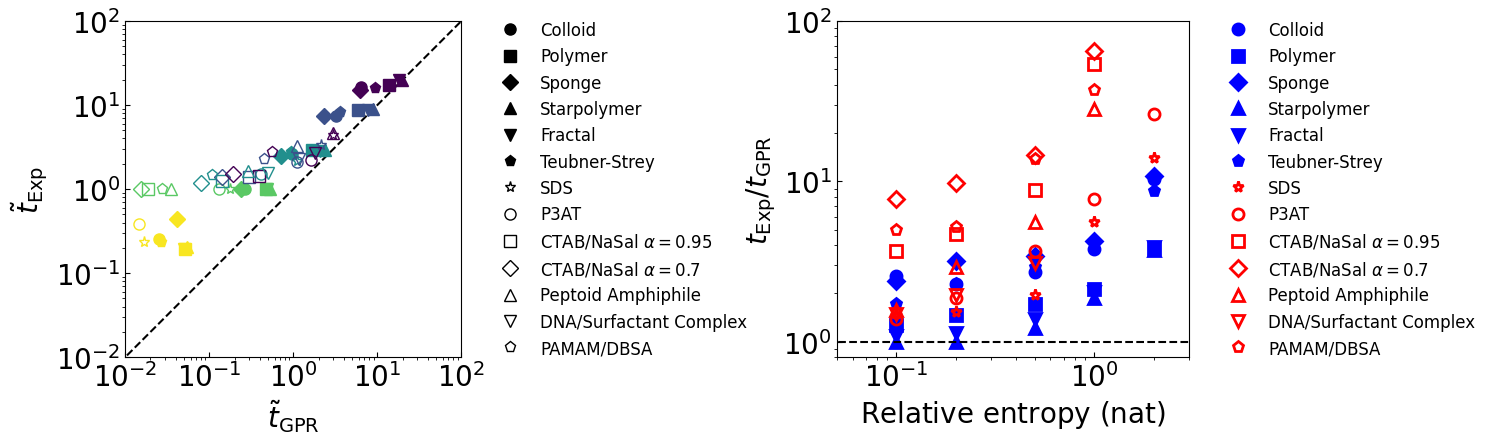

In [7]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
ax.plot([1e-3, 1e3], [1e-3, 1e3], '--', color='black')
# ax.plot([1e-3, 1e3], [3e-3, 3e3], '--', color='black')
# ax.plot([1e-3, 1e3], [1e-2, 1e4], '--', color='black')
# ax.fill_between([1e-3, 1e3], [1e-3, 1e3], [1e-2, 1e4], color='gray', alpha=0.1)

for i_f, filename in enumerate(filename_list):
    data = np.loadtxt(filename)
    time_gpr, time_exp = extract_time_interp(data, H_list=H_list)
    fillstyle = 'full' if exp_list[i_f] else 'none'
    
    for i_H, H in enumerate(H_list):
        label = None
        if i_H == 0:
            label = (filename.split('_')[2]).split('.')[0]
            label = labels_list[i_f]
            ax.plot([0,0], [0,0], marker=markers_list[i_f], color='k', label=label, markersize=8, fillstyle=fillstyle, linestyle='', markeredgewidth=1)
        ax.plot(time_gpr[i_H]/time_exp[1], time_exp[i_H]/time_exp[1], marker=markers_list[i_f], color=colors_list_viridis[i_H], label=None, markersize=8, fillstyle=fillstyle, linestyle='', markeredgewidth=1)
    

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-2, 1e2])
ax.set_xlim([1e-2, 1e2])
ax.set_aspect('equal')
ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=12)

# ax.legend(frameon=False, loc='lower right', ncol=1)
ax.tick_params(direction='in', labelsize=20)
# ax.tick_params(axis='x', direction='in', labelsize=18)
ax.set_xlabel(r'$\tilde{t}_\mathrm{GPR}$', fontsize=20)
ax.set_ylabel(r'$\tilde{t}_\mathrm{Exp}$', fontsize=20)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=9)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.xaxis.set_major_locator(locmaj)
ax.yaxis.set_major_locator(locmaj)

ax = plt.subplot(1, 2, 2)
H_list = [2, 1, 0.5, 0.2, 0.1]
for i_f, filename in enumerate(filename_list):
    data = np.loadtxt(filename)
    time_gpr, time_exp = extract_time_interp(data, H_list=H_list)
    fillstyle = 'full' if exp_list[i_f] else 'none'
    
    for i_H, H in enumerate(H_list):
        label = None
        if i_H == 0:
            # label = (filename.split('_')[2]).split('.')[0]
            label = labels_list[i_f]
        ax.plot(H, time_exp[i_H]/time_gpr[i_H], marker=markers_list[i_f], color=colors_list[i_f], label=label, markersize=8, fillstyle=fillstyle, linestyle='', markeredgewidth=2)
    
ax.plot([-1, 1e2], [1, 1], '--', color='black')
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=12)
ax.tick_params(direction='in', labelsize=20)
ymax = 100
ax.set_ylim(0.8, ymax)
ax.set_xlim(0.05, 3)
# ax.tick_params(axis='x', direction='in', labelsize=18)
ax.set_xlabel(r'$\mathrm{Relative\ entropy\ (nat)}$', fontsize=20)
ax.set_ylabel(r'$t_\mathrm{Exp}/t_\mathrm{GPR}$', fontsize=20)
ax.set_aspect(np.log(0.05/2.5)/np.log(0.8/ymax))
plt.tight_layout(pad=2.7)